In [5]:
# pip install WordCloud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# pip install plotly

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.shape

(50000, 2)

Text(0.5, 1.0, 'Sentiment Distribution')

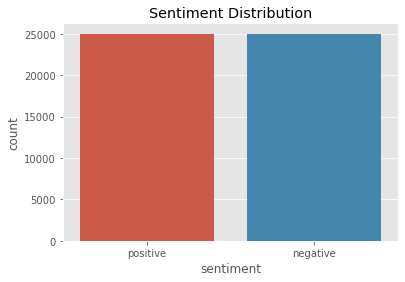

In [11]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment Distribution')

# Reading of first five review

In [13]:
for i in range(5):
    print("Review",[i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment: ",df['sentiment'].iloc[i],"\n\n")

Review [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [13]:
# Find number of word in each review

In [14]:
def no_of_words(text):
    words=text.split()
    word_count=len(words)
    return word_count

In [15]:
df['Word Count']=df['review'].apply(no_of_words)

In [16]:
df.head()

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


# Now convert target columns into numerical formats

In [18]:
df.sentiment.replace('positive',1,inplace=True)
df.sentiment.replace('negative',0,inplace=True)

In [20]:
df

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


In [21]:
# Text processing for conversion.Apply data processing functions to remove punctation mark,hash tag,url etc

In [22]:
def data_preprocessing(text):
    text=text.lower()
    text=re.sub('<br />','',text)
    text=re.sub(r'http\S+','',text,flags=re.MULTILINE)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return" ".join(filtered_text)

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df.review=df['review'].apply(data_preprocessing)

In [25]:
df['Word Count']=df['review'].apply(no_of_words)

In [26]:
df

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


In [27]:
duplicated_count=df.duplicated().sum()
print("Number of duplicated entries:",duplicated_count)

Number of duplicated entries: 422


In [28]:
df=df.drop_duplicates('review')

In [29]:
df

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


In [30]:
duplicated_count=df.duplicated().sum()
print("Number of duplicated entries:",duplicated_count)

Number of duplicated entries: 0


# Perform Stemming on text data

In [31]:
stemmer=PorterStemmer()
def stemming (data):
    text=[stemmer.stem(word) for word in data]
    return data

In [32]:
df.review=df['review'].apply(lambda x:stemming(x))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Now chek number of word after preprocessing 

In [33]:
df['Word Count']=df['review'].apply(no_of_words)
df.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_14932/1144763576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word Count']=df['review'].apply(no_of_words)


,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


# Split data for model bulding

In [19]:
X=df['review']
Y=df['sentiment']

In [20]:
vect=TfidfVectorizer()
X=vect.fit_transform(df['review'])

In [26]:
X

<50000x101895 sparse matrix of type '<class 'numpy.float64'>'
	with 6826529 stored elements in Compressed Sparse Row format>

In [27]:
X[0]

<1x101895 sparse matrix of type '<class 'numpy.float64'>'
	with 186 stored elements in Compressed Sparse Row format>

In [28]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

In [30]:
print("Size of x_train : ",(x_train.shape))
print("Size of y_train : ",(y_train.shape))
print("Size of x_test : ",(x_test.shape))
print("Size of y_test : ",(y_test.shape))

Size of x_train :  (35000, 101895)
Size of y_train :  (35000,)
Size of x_test :  (15000, 101895)
Size of y_test :  (15000,)


# Reduce data size for demonstartion as it will face problem of processing on hardware
<!-- Preperation of data for neural network -->

In [31]:
x_train=x_train[:10000, :10000]
y_train=y_train[:10000]
x_test=x_test[:2000, :10000]
y_test=y_test[:2000]

In [32]:
print("Size of x_train : ",(x_train.shape))
print("Size of y_train : ",(y_train.shape))
print("Size of x_test : ",(x_test.shape))
print("Size of y_test : ",(y_test.shape))

Size of x_train :  (10000, 10000)
Size of y_train :  (10000,)
Size of x_test :  (2000, 10000)
Size of y_test :  (2000,)


In [33]:
x_train_new=x_train
y_train_new=y_train
x_test_new=x_test
y_test_new=y_test

In [34]:
print("Size of x_train_new : ",(x_train_new.shape))
print("Size of y_train_new : ",(y_train_new.shape))
print("Size of x_test_new: ",(x_test_new.shape))
print("Size of y_test_new : ",(y_test_new.shape))

Size of x_train_new :  (10000, 10000)
Size of y_train_new :  (10000,)
Size of x_test_new:  (2000, 10000)
Size of y_test_new :  (2000,)


In [35]:
x_train_new

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 157200 stored elements in Compressed Sparse Row format>

In [36]:
y_train_new

38094    0
40624    1
49425    0
35734    1
41708    0
        ..
7110     1
46643    1
5440     1
33017    0
47138    0
Name: sentiment, Length: 10000, dtype: int64

In [37]:
x_train_new=x_train_new.toarray()
x_test_new=x_test_new.toarray()

In [38]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model=Sequential()
model.add(Dense(units=16,activation='relu',input_dim=x_train_new.shape[1]))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [40]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
x_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
y_train_new

38094    0
40624    1
49425    0
35734    1
41708    0
        ..
7110     1
46643    1
5440     1
33017    0
47138    0
Name: sentiment, Length: 10000, dtype: int64

In [43]:
history=model.fit(x_train_new,y_train_new,batch_size=10,epochs=15)

Epoch 1/15
1000/1000 [==============================] - 3s 2ms/step - loss: 0.6392 - accuracy: 0.6488
Epoch 2/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5274 - accuracy: 0.7450
Epoch 3/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4981 - accuracy: 0.7613
Epoch 4/15
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4849 - accuracy: 0.7692
Epoch 5/15
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4769 - accuracy: 0.7756
Epoch 6/15
1000/1000 [==============================] - 2s 1ms/step - loss: 0.4703 - accuracy: 0.7796
Epoch 7/15
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4646 - accuracy: 0.7812
Epoch 8/15
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4596 - accuracy: 0.7856
Epoch 9/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4562 - accuracy: 0.7876
Epoch 10/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.451

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________


In [45]:
test_loss, test_acc = model.evaluate(x_test_new, y_test_new)

63/63 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7430


In [46]:
print("test_loss: ", test_loss)

test_loss:  0.5220049023628235


In [47]:
print("test_acc: ", test_acc)

test_acc:  0.7429999709129333


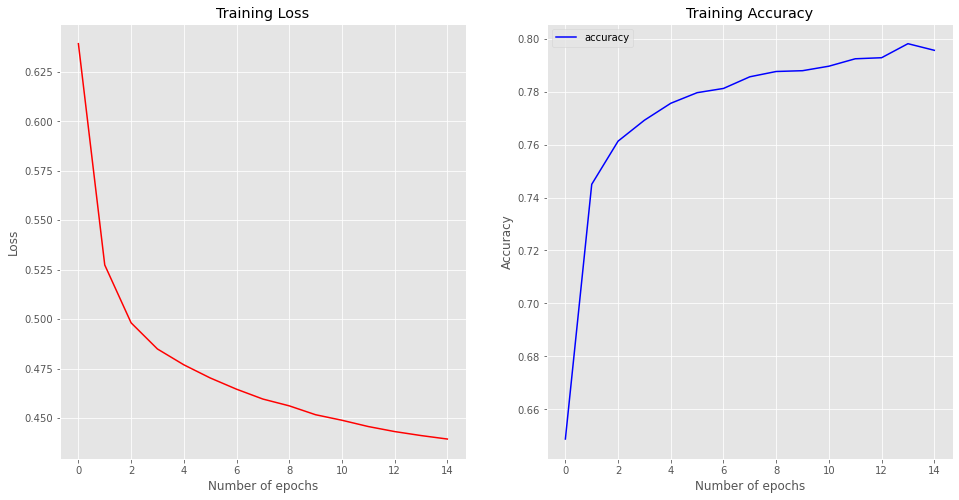

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
Similarly we can check the performance on different optimizer 'adam'